In [2]:
###importing all the libraries
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
###Read the data

In [4]:
train_data=pd.read_excel('TRAIN.xlsx')
test_data=pd.read_excel('TEST.xlsx')

In [5]:
train_data.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
test_data.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
0,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,21:05 10 May,24h 40m,1 stop,No info
1,GoAir,15/04/2019,Banglore,Delhi,BLR → DEL,20:55,23:40,2h 45m,non-stop,No info


In [7]:
###### Explore the datasets

In [8]:
train_data.shape

(9000, 11)

In [9]:
test_data.shape

(1683, 10)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            9000 non-null   object
 1   Date               9000 non-null   object
 2   Departure Station  9000 non-null   object
 3   Arrival Station    9000 non-null   object
 4   Route Map          9000 non-null   object
 5   Departure Time     9000 non-null   object
 6   Arrival Time       9000 non-null   object
 7   Journey Time       9000 non-null   object
 8   Stops              9000 non-null   object
 9   Extra Info         9000 non-null   object
 10  Price              9000 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 773.6+ KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            1683 non-null   object
 1   Date               1683 non-null   object
 2   Departure Station  1683 non-null   object
 3   Arrival Station    1683 non-null   object
 4   Route Map          1682 non-null   object
 5   Departure Time     1683 non-null   object
 6   Arrival Time       1683 non-null   object
 7   Journey Time       1683 non-null   object
 8   Stops              1682 non-null   object
 9   Extra Info         1683 non-null   object
dtypes: object(10)
memory usage: 131.6+ KB


In [12]:
###Check Price Distribution

In [13]:
import matplotlib as plt
import seaborn as sns

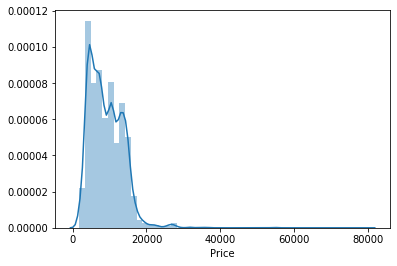

In [14]:
sns.distplot(train_data.Price)

In [15]:
train_data['Price'].describe()

count     9000.000000
mean      9087.764333
std       4605.498942
min       1759.000000
25%       5228.000000
50%       8369.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

##The maximum ticket price is Rs.79512 and minimum is Rs.1759.

#missing value treatment for train and test data

In [16]:
train_data.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
dtype: int64

In [17]:
test_data.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            1
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                1
Extra Info           0
dtype: int64

In [18]:
test_data.isnull().sum()/len(test_data)*100

Airline              0.000000
Date                 0.000000
Departure Station    0.000000
Arrival Station      0.000000
Route Map            0.059418
Departure Time       0.000000
Arrival Time         0.000000
Journey Time         0.000000
Stops                0.059418
Extra Info           0.000000
dtype: float64

In [19]:
test_data[test_data['Route Map'].isnull()]

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
41,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info


In [20]:
test_data['Route Map']=test_data['Route Map'].fillna(test_data['Route Map'].mode()[0])

In [21]:
test_data['Stops']=test_data['Stops'].fillna(test_data['Stops'].mode()[0])

In [22]:
test_data.isnull().sum().sum()

0

In [23]:
test_data['Route Map'].mode()[0]

'DEL → BOM → COK'

In [24]:
test_data['Stops'].mode()[0]

'1 stop'

In [25]:
#Adding the relevent columns that help to make inferences better
train_data["Extra Info"] = train_data["Extra Info"].replace({'No info': 'No Info'})

In [26]:
train_data["Extra Info"].value_counts()

No Info                         7055
In-flight meal not included     1649
No check-in baggage included     270
1 Long layover                    17
Change airports                    4
Business class                     3
1 Short layover                    1
Red-eye flight                     1
Name: Extra Info, dtype: int64

In [27]:
# Duration convert hours in min.
train_data['Journey Time']=  train_data['Journey Time'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Journey Time']=  test_data['Journey Time'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [28]:
train_data.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No Info,7662


In [29]:
test_data.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
0,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,21:05 10 May,1480,1 stop,No info
1,GoAir,15/04/2019,Banglore,Delhi,BLR → DEL,20:55,23:40,165,non-stop,No info


In [30]:
#adding relevent columns that help to make inferences better
#for train_data

In [31]:
# Date_of_Journey
train_data["Journey_day"] = train_data['Date'].str.split('/').str[0].astype(int)
train_data["Journey_month"] = train_data['Date'].str.split('/').str[1].astype(int)
train_data.drop(["Date"], axis = 1, inplace = True)

# Dep_Time
train_data["Dep_hour"] = pd.to_datetime(train_data["Departure Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Departure Time"]).dt.minute
train_data.drop(["Departure Time"], axis = 1, inplace = True)

# Arrival_Time
train_data["Arrival_hour"] = pd.to_datetime(train_data['Arrival Time']).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data['Arrival Time']).dt.minute
train_data.drop(["Arrival Time"], axis = 1, inplace = True)

In [32]:
#for test_data
# Date_of_Journey
test_data["Journey_day"] = test_data['Date'].str.split('/').str[0].astype(int)
test_data["Journey_month"] = test_data['Date'].str.split('/').str[1].astype(int)
test_data.drop(["Date"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Departure Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Departure Time"]).dt.minute
test_data.drop(["Departure Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data['Arrival Time']).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data['Arrival Time']).dt.minute
test_data.drop(["Arrival Time"], axis = 1, inplace = True)

In [33]:
# Total_Stops(Label encoding)
train_data['Total_Stops']=train_data['Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
test_data['Total_Stops']=test_data['Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
train_data.drop(["Stops"], axis = 1, inplace = True)
test_data.drop(["Stops"], axis = 1, inplace = True)

In [34]:
#####Convert categorical data into numerical

In [35]:
train_categorical_data = train_data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = train_data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_data.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_data.select_dtypes(include=['int64', 'float','int32'])

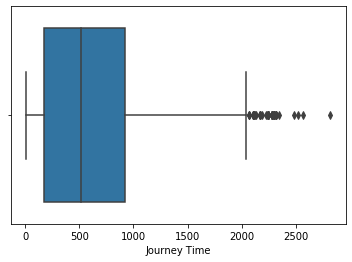

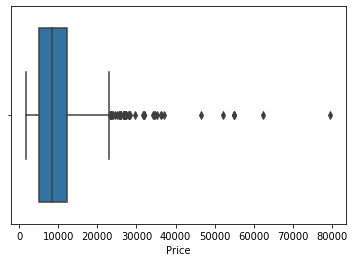

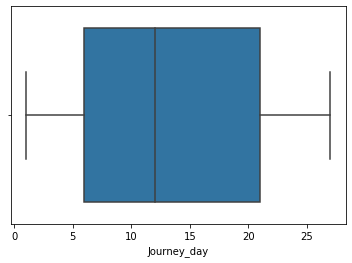

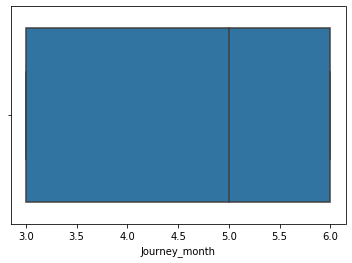

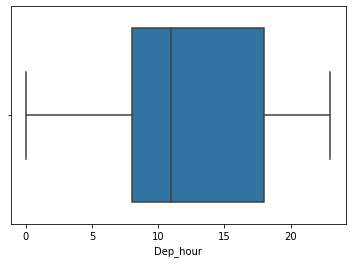

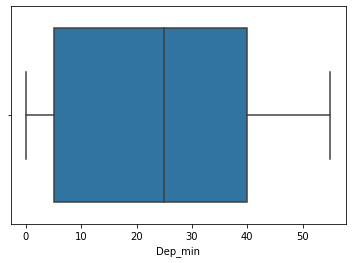

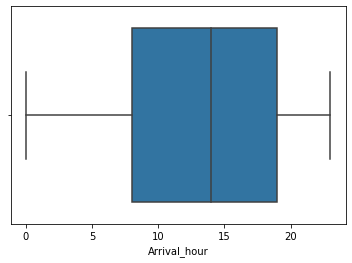

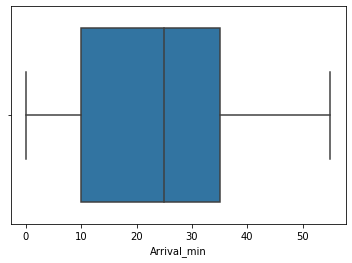

In [36]:
#Outlier
import matplotlib.pyplot as p
for i in train_numerical_data.columns:
    sb.boxplot(train_numerical_data[i])
    p.show()

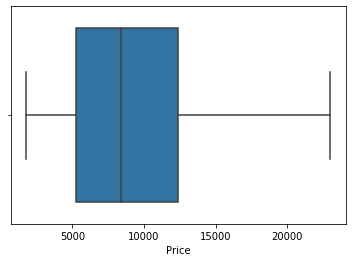

In [37]:
q3= train_numerical_data['Price'].quantile(0.75)
q1= train_numerical_data['Price'].quantile(0.25)
iqr = q3-q1
ub = q3 +1.5*iqr
lb = q1 - 1.5*iqr
train_numerical_data['Price']=train_numerical_data['Price'].replace(train_numerical_data[train_numerical_data['Price']>ub]['Price'],train_numerical_data['Price'].quantile(0.99))
train_numerical_data['Price']=train_numerical_data['Price'].replace(train_numerical_data[train_numerical_data['Price']<lb]['Price'],train_numerical_data['Price'].quantile(0.01))
sb.boxplot(train_numerical_data['Price'])

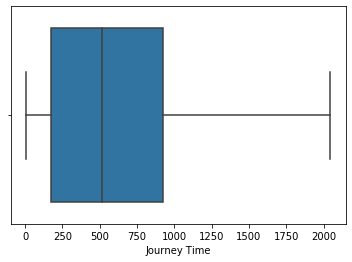

In [38]:
q3= train_numerical_data['Journey Time'].quantile(0.75)
q1= train_numerical_data['Journey Time'].quantile(0.25)
iqr = q3-q1
ub = q3 +1.5*iqr
lb = q1 - 1.5*iqr
train_numerical_data['Journey Time']=train_numerical_data['Journey Time'].replace(train_numerical_data[train_numerical_data['Journey Time']>ub]['Journey Time'],train_numerical_data['Journey Time'].quantile(0.99))
train_numerical_data['Journey Time']=train_numerical_data['Journey Time'].replace(train_numerical_data[train_numerical_data['Journey Time']<lb]['Journey Time'],train_numerical_data['Journey Time'].quantile(0.01))
sb.boxplot(train_numerical_data['Journey Time'])

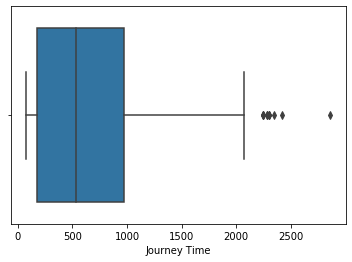

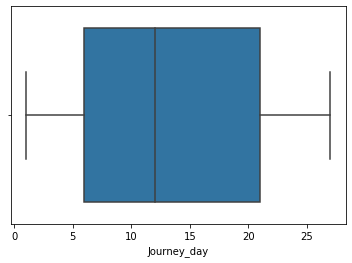

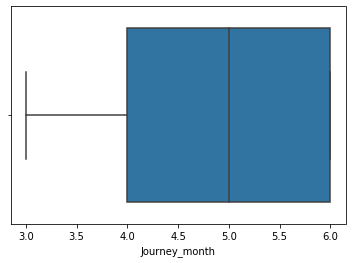

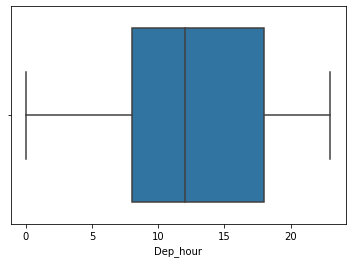

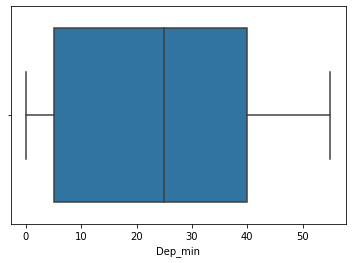

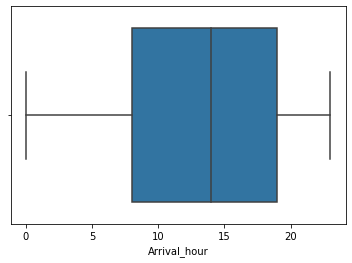

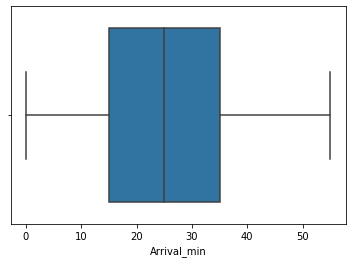

In [39]:
for i in test_numerical_data.columns:
    sb.boxplot(test_numerical_data[i])
    p.show()

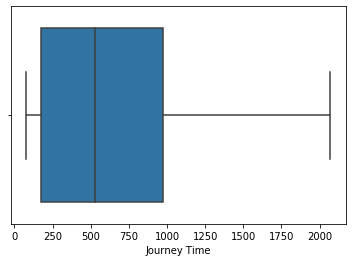

In [40]:
q3= test_numerical_data['Journey Time'].quantile(0.75)
q1= test_numerical_data['Journey Time'].quantile(0.25)
iqr = q3-q1
ub = q3 +1.5*iqr
lb = q1 - 1.5*iqr
test_numerical_data['Journey Time']=test_numerical_data['Journey Time'].replace(test_numerical_data[test_numerical_data['Journey Time']>ub]['Journey Time'],test_numerical_data['Journey Time'].quantile(0.99))
test_numerical_data['Journey Time']=test_numerical_data['Journey Time'].replace(test_numerical_data[test_numerical_data['Journey Time']<lb]['Journey Time'],test_numerical_data['Journey Time'].quantile(0.01))
sb.boxplot(test_numerical_data['Journey Time'])

#label encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [42]:
train_categorical_data.head(2)

,Airline,Departure Station,Arrival Station,Route Map,Extra Info,Total_Stops
0,3,0,5,16,5,0
1,1,3,0,80,5,0


In [43]:
test_categorical_data.head(2)

,Airline,Departure Station,Arrival Station,Route Map,Extra Info,Total_Stops
0,4,3,0,43,7,0
1,2,0,2,15,7,0


In [44]:
train_inp= pd.concat([train_categorical_data, train_numerical_data], axis=1)
train_inp=train_inp.drop(['Price'],axis=1)
train_out=train_data['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)

In [45]:
#splitting training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_inp,train_out,test_size=0.3,random_state=48)

In [46]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (6300, 13)
The size of training output is (6300,)
The size of testing input is (2700, 13)
The size of testing output is (2700,)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

In [48]:
regs1=LinearRegression()
regs2=DecisionTreeRegressor(random_state=42)
regs3=BaggingRegressor(random_state=42)
regs4=RandomForestRegressor(random_state=42)
regs5=AdaBoostRegressor(random_state=42)
regs6=GradientBoostingRegressor(random_state=42)
regs7=XGBRegressor(random_state=42)
regs8=KNeighborsRegressor()

In [49]:
from sklearn.model_selection import cross_val_score
for i,j in zip([regs1,regs2,regs3,regs4,regs5,regs6,regs7,regs8],['LoR','DT','Bag','RF','Ada','GBoost','XGB','KNN']):
    res=cross_val_score(i,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    res1=np.sqrt(abs(res))
    print(j,'Mean error:',np.mean(res1),'Variance Error:',np.std(res1))

LoR Mean error: 3743.75878064586 Variance Error: 124.10649451210074
DT Mean error: 2210.2822198666427 Variance Error: 236.87851040417004
Bag Mean error: 1737.7371971943448 Variance Error: 165.3235924823866
RF Mean error: 1653.5710395768815 Variance Error: 97.5481234602721
Ada Mean error: 3479.202607618251 Variance Error: 175.3167514378488
GBoost Mean error: 2036.6567133017736 Variance Error: 218.61620585520697
XGB Mean error: 1642.4085436402615 Variance Error: 135.54362389475506
KNN Mean error: 3088.5991555837127 Variance Error: 132.49972727359702


In [50]:
from sklearn.model_selection import cross_val_score
for i,j in zip([regs1,regs2,regs3,regs4,regs5,regs6,regs7,regs8],['LoR','DT','Bag','RF','Ada','GBoost','XGB','KNN']):
    res=cross_val_score(i,X_train,y_train,cv=5,scoring='r2')
    print(j,'Mean Error:',np.mean(res),'Variance Error:',np.std(res))

LoR Mean Error: 0.3238673221559859 Variance Error: 0.029963959619107458
DT Mean Error: 0.7614307720681772 Variance Error: 0.050515764775618026
Bag Mean Error: 0.8537648457099583 Variance Error: 0.023533484950414598
RF Mean Error: 0.8679201720535691 Variance Error: 0.012649069555465513
Ada Mean Error: 0.41462514663448163 Variance Error: 0.05517638994170703
GBoost Mean Error: 0.799021005733694 Variance Error: 0.03536143694242731
XGB Mean Error: 0.8690773736633105 Variance Error: 0.020166133470289574
KNN Mean Error: 0.5402113292975284 Variance Error: 0.019131681969499416


In [51]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=48)
param={'n_estimators':[5,10,15,20,25,30,35,40],'max_depth':[5,8,12,20,25,30],'max_features':['auto','log2','sqrt'],'max_samples':[0.5,0.6,0.7],'min_samples_leaf':[10,20,30]}
grid=GridSearchCV(rf,param_grid=param,scoring='neg_mean_absolute_error',return_train_score=True)
hyp_rf=grid.fit(X_train,y_train)
ypred=hyp_rf.predict(X_test)

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,ypred)

0.7794769012652467

In [53]:
mse=mean_squared_error(y_test,ypred)
mse

4897287.557062073

In [54]:
rmse=np.sqrt(mse)
rmse

2212.9815988982086

In [55]:
from sklearn.model_selection import RandomizedSearchCV
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [56]:
y_test_pred = model.predict(test_set)
#y_test_pred = model.predict(X_test)
y_test_pred=pd.DataFrame(y_test_pred)

In [57]:
y_test_pred.shape

(1683, 1)

In [58]:
y_test_pred.head(10)

,0
0,12719.081055
1,3712.237305
2,8862.392578
3,4905.662598
4,3361.811768
5,13388.026367
6,10036.425781
7,7273.845215
8,9116.158203
9,6887.285156


In [59]:
Output=y_test_pred
Output

,0
0,12719.081055
1,3712.237305
2,8862.392578
3,4905.662598
4,3361.811768
...,...
1678,9754.142578
1679,3403.941406
1680,4590.844238
1681,5207.730957


In [60]:
Output.to_csv('submission.csv')

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True,random_state=48)
from sklearn.model_selection import GridSearchCV
tuned_params = {'max_depth': [2,4,6,8],'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [200,400,600,800], 'reg_lambda': [0.001, 0.1, 1.0,10.0, 100.0]}
model = GridSearchCV(XGBRegressor(),tuned_params,scoring = 'neg_mean_absolute_error', cv=kf, n_jobs=-1)
model.fit(X_train,y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
print("Train Results for XGBoost Regressor Model:")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for XGBoost Regressor Model:")
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

In [ ]:
mse=mean_squared_error(y_test,y_test_pred)
mse